<a href="https://colab.research.google.com/github/MerveDemirden/GlobalAIHub_PythonProjeleri/blob/main/Proje2_PythonBootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kütüphanelerin import edilmesi

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Dataset'in yüklenmesi

In [ ]:
veri=pd.read_csv("NetflixOriginals.csv",encoding = "ISO-8859-1")

1. Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.

    index  Runtime  Language
0     561      209   English
1     328      155   English
2     581      153   English
3     247      151   English
4     284      151  Japanese
5     509      149     Hindi
6       7      149   English
7     543      149     Hindi
8     194      148   English
9       5      147     Hindi
10    545      144   English
11     16      144     Hindi
12    389      144   English
13    118      142  Japanese
14    365      142     Hindi
15    495      140   English
16    254      139   Spanish
17      9      139     Hindi
18    474      138   English
19    536      137   English


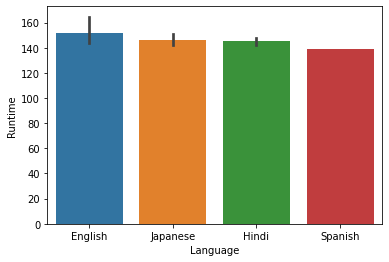

In [ ]:
uzun_soluklu_filmler = veri.sort_values("Runtime",ascending=False)[:20] # En uzun süreye göre 20 film sıralandı.
print(uzun_soluklu_filmler[["Runtime","Language"]].reset_index())       #reset.index() methoduyla indexler düzenlendi.
veri['Runtime'].mean()

#Görselde uzun soluklu filmlerin süreleri karşılaştırılırken 93 dakikadan büyük ve eşit olan filmler seçildi.
sns.barplot(x=uzun_soluklu_filmler["Language"],y=uzun_soluklu_filmler.loc[(uzun_soluklu_filmler["Runtime"]>= 93)]["Runtime"])
plt.show()

Görselde x ekseni Uzun Souklu Filmler kategorisine giren filmlerin dillerini verirken y ekseni ise bu filmlerin süreleri hakkında bilgi verir. 

Grafikte görüldüğü üzere en uzun süreye sahip olan filmlerin dili İngilizce iken en kısa süreye sahip filmlerin dili İspanyolcadır

2. 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.

In [ ]:
veri["Date"] = pd.to_datetime(veri.Premiere)

veri.loc[(veri["Genre"] == "Documentary") & (veri["Date"] > "2019-01-31") & (veri["Date"] < "2020-06-01")].head(10) # Aralıklıktaki 10 belgesel filmi aldık. 

belgesel = veri.loc[(veri["Genre"] == "Documentary") & (veri["Date"] > "2019-01-31") & (veri["Date"] < "2020-06-01")].head(10)
belgesel["Title"].value_counts()

print(veri.loc[(veri["Genre"] == "Documentary") & (veri["Date"] > "2019-01-31") & (veri["Date"] < "2020-06-01")].head(10))

# Barplot Çizimi
grafik = px.bar(data_frame=belgesel, x=belgesel.Title, y=belgesel["IMDB Score"], labels={"y":"IMDB Score", "index":"Titles"})
grafik.update_layout(xaxis={"categoryorder":"total descending"})

grafik.show()

                                        Title        Genre  \
0                             Enter the Anime  Documentary   
15                             After the Raid  Documentary   
20          Hello Privilege. It's Me, Chelsea  Documentary   
30                                After Maria  Documentary   
111                      Ghosts of Sugar Land  Documentary   
263                    A Tale of Two Kitchens  Documentary   
286              The Legend of Cocaine Island  Documentary   
290          Travis Scott: Look Mom I Can Fly  Documentary   
295                                   Birders  Documentary   
303  Murder to Mercy: The Cyntoia Brown Story  Documentary   

               Premiere  Runtime  IMDB Score          Language       Date  
0        August 5, 2019       58         2.5  English/Japanese 2019-08-05  
15    December 19, 2019       25         4.3           Spanish 2019-12-19  
20   September 13, 2019       64         4.4           English 2019-09-13  
30         Ma

Görselde x ekseni Documentary türündeki filmleri gösterirken y ekseni bu filmlerin IMDB puanlarını göstermektedir.

Grafiğe bakıldığında Documentary kategorisinde en yüksek IMDB puanına sahip filmler 6.4 puan ile "Murder to Mercy:The Cynto Brown Story" ve "Birders" iken en düşük IMDB puanına sahip olan film ise 2.5 puan ile "Enter the Anime"dir.

3. İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?

In [ ]:
d=veri.query("Language=='English'")  #query() methodu ile dili ingilizce olan filmlerin sorgusu yeni bir dataframe oluşturularak getirilir.
d=d.sort_values(by="IMDB Score",ascending=False) #IMDB puanına göre azalan olarak sıralanır.
print(d.iloc[0])

Title         David Attenborough: A Life on Our Planet
Genre                                      Documentary
Premiere                               October 4, 2020
Runtime                                             83
IMDB Score                                         9.0
Language                                       English
Date                               2020-10-04 00:00:00
Name: 583, dtype: object


Görüldüğü gibi en yüksek IMDB puanına sahip olan filmler 9.0 puan ile İngilizcedir.

4. 'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?

In [ ]:
r=veri["Runtime"] 
l=veri["Language"] 
sum=0              
counter=0
c=0               # c değişkeni burada hindi dilinde çekilmiş olan film sayısını verir.
for i in l:
  if i=="Hindi":
    sum+=r[counter]
    c+=1
  counter+=1

print(sum/c)      # Hindi dilindeki filmlerin toplam süresi / Hindi dilindeki filmlerin toplam sayısı

115.78787878787878


Hindi dilinde çekilmiş filmerin ortalama runtime süresi 115.78 dir.

5. 'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.

In [ ]:
print('Toplam Tür kategorisi:' ,veri["Genre"].nunique())  # nunique() yöntemi, her sütun için benzersiz değerlerin sayısını döndürür.
print(veri["Genre"].value_counts())                       # Tür sayısını yazdırdık. 
toplam_tür = veri["Genre"].value_counts().nlargest(10)
#nlargest() yöntemi, bir veri setinden veya bir diziden en büyük n değeri elde etmek için kullanılır. 
# 10 türün içinden sayısı en çok olan türü getirmesini istedik ve bunu toplam_tür değişkenine atadık.

#BarPlot Çizimi
grafik = px.bar(data_frame=toplam_tür, x=toplam_tür.index, y=toplam_tür.values, labels={"y":"Count", "index":"Genres"},title=("Total Number of Species by Categories"))
grafik.update_layout(xaxis={"categoryorder":"total descending"})
grafik.show()

Toplam Tür kategorisi: 115
Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Romantic comedy-drama                     1
Heist film/Thriller                       1
Musical/Western/Fantasy                   1
Horror anthology                          1
Animation/Christmas/Comedy/Adventure      1
Name: Genre, Length: 115, dtype: int64


Grafikte x ekseni film türlerini gösterirken y ekseni bu türe ait olan film sayılarını gösterir.

Görüldüğü üzere, filmlerin çoğu Documentary kategorisinde iken, en az sayıda film olan kategori Action dır. 

6. Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.


In [ ]:
print(veri.Language.value_counts().head(3))

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64


Veri setinde 401 tane olmak üzere en çok sayıda bulunan film İngilizcedir. İkinci sırada 33 tane film ile Hindi dilidir. Son olarak 31 tane film ise İspanyolcadır.

7. IMDB puanı en yüksek olan ilk 10 film hangileridir?

583       David Attenborough: A Life on Our Planet
582      Emicida: AmarElo - It's All For Yesterday
581                        Springsteen on Broadway
580    Winter on Fire: Ukraine's Fight for Freedom
579          Taylor Swift: Reputation Stadium Tour
578     Ben Platt: Live from Radio City Music Hall
577                         Dancing with the Birds
576                        Cuba and the Cameraman 
573                                          Klaus
571                                           13th
Name: Title, dtype: object


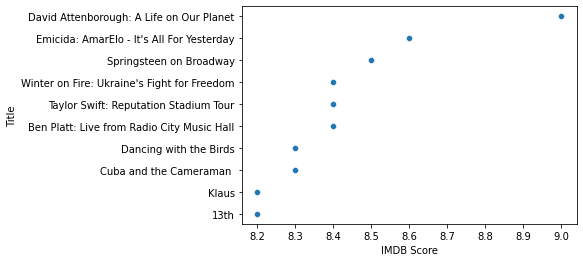

In [ ]:
en_yuksek_IMDB= veri.sort_values(by="IMDB Score",ascending=False)[:10]
print(en_yuksek_IMDB['Title'])

#ScatterPlot Çizimi
sns.scatterplot(x=en_yuksek_IMDB['IMDB Score'],y=en_yuksek_IMDB['Title'])

Grafikte x ekseni IMDB puanını gösterirken y ekseni filmleri göstermektedir. En yüksek IMDB puanına sahip film "David Attenborough : A life on Our PLanet" iken en düşük IMDB puanına sahip film ise "13th" dir.

8. IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.

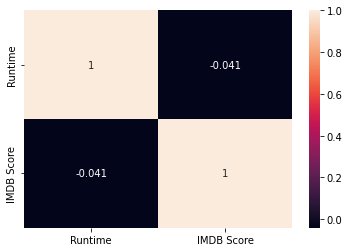

In [ ]:
cor_analiz=veri.corr()
cor_analiz 
#Heatmap Çizimi
sns.heatmap(cor_analiz, annot= True)

Korelasyon katsayısının 0’a yaklaşması değişkenler arasında zayıf ilişkinin varlığını gösterir. Değişkenler birlikte artıyor veya azalıyorsa pozitif yönlü, değişkenlerden biri artarken diğeri azalıyorsa ise negatif yönlü bir ilişki vardır.

Grafikte görüldüğü üzere Runtime ile IMDB puanı arasında negatif yönlü zayıf bir ilişki söz konusudur.

9. IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.

                                  Genre  IMDB Score
0                           Documentary         9.0
1                          One-man show         8.5
2                          Concert Film         8.4
3  Animation/Christmas/Comedy/Adventure         8.2
4                                 Drama         7.9
5                     Animation / Short         7.8
6                           Crime drama         7.8
7                       Musical / Short         7.7
8                             Making-of         7.7
9                             War drama         7.7


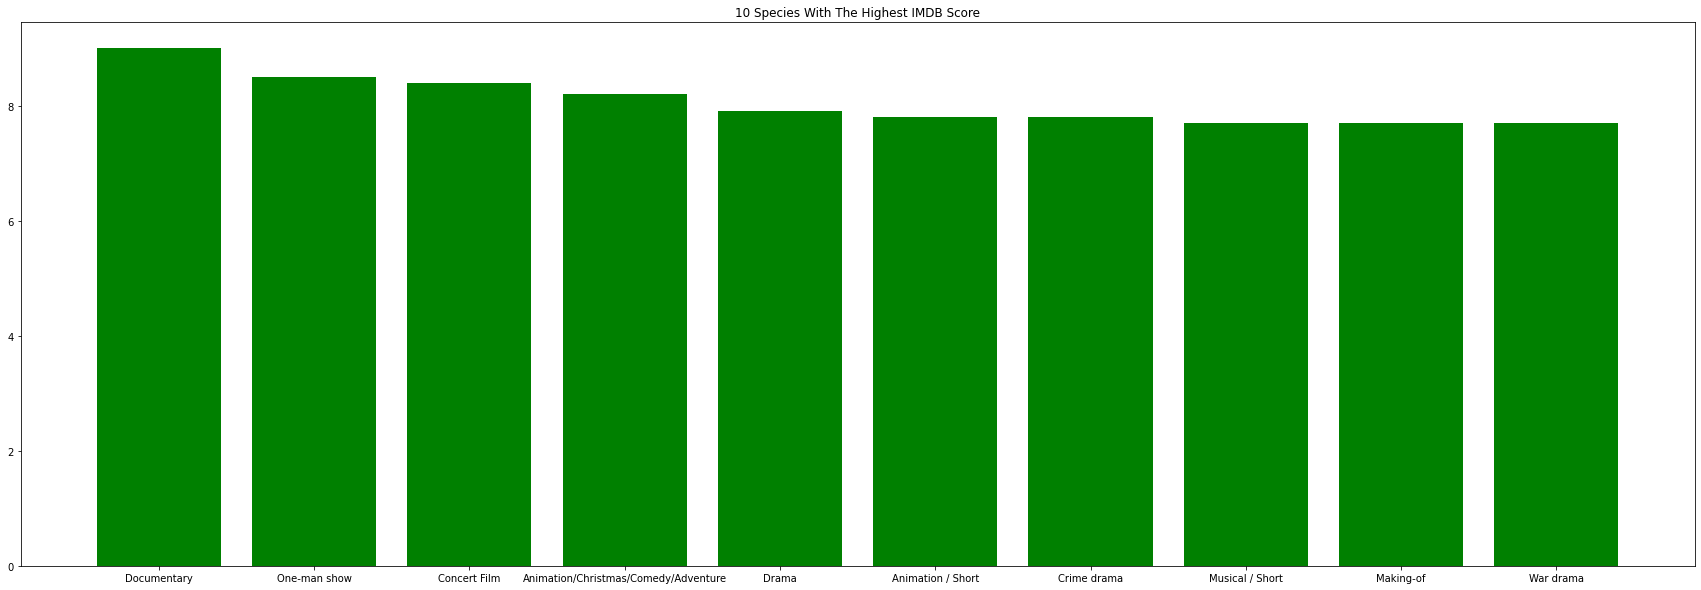

In [ ]:
en_yuksek_genre = veri.groupby("Genre").agg({"IMDB Score": "max"}).sort_values(by="IMDB Score", ascending=False)[:10].reset_index()
print(en_yuksek_genre)

#Barplot Çizimi
plt.figure(figsize=(30,10))
plt.bar(en_yuksek_genre["Genre"], en_yuksek_genre["IMDB Score"],color='green')
plt.title('10 Species With The Highest IMDB Score')
plt.show()

Grafikte x ekseni film türlerini gösterirken y ekseni IMDB puanlarını göstermektedir. En yüksek IMDB puanına sahip olan film türü "Documentary", en düşük IMDB puanına sahip olan film türü ise "War Drama"dır.

10. 'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.

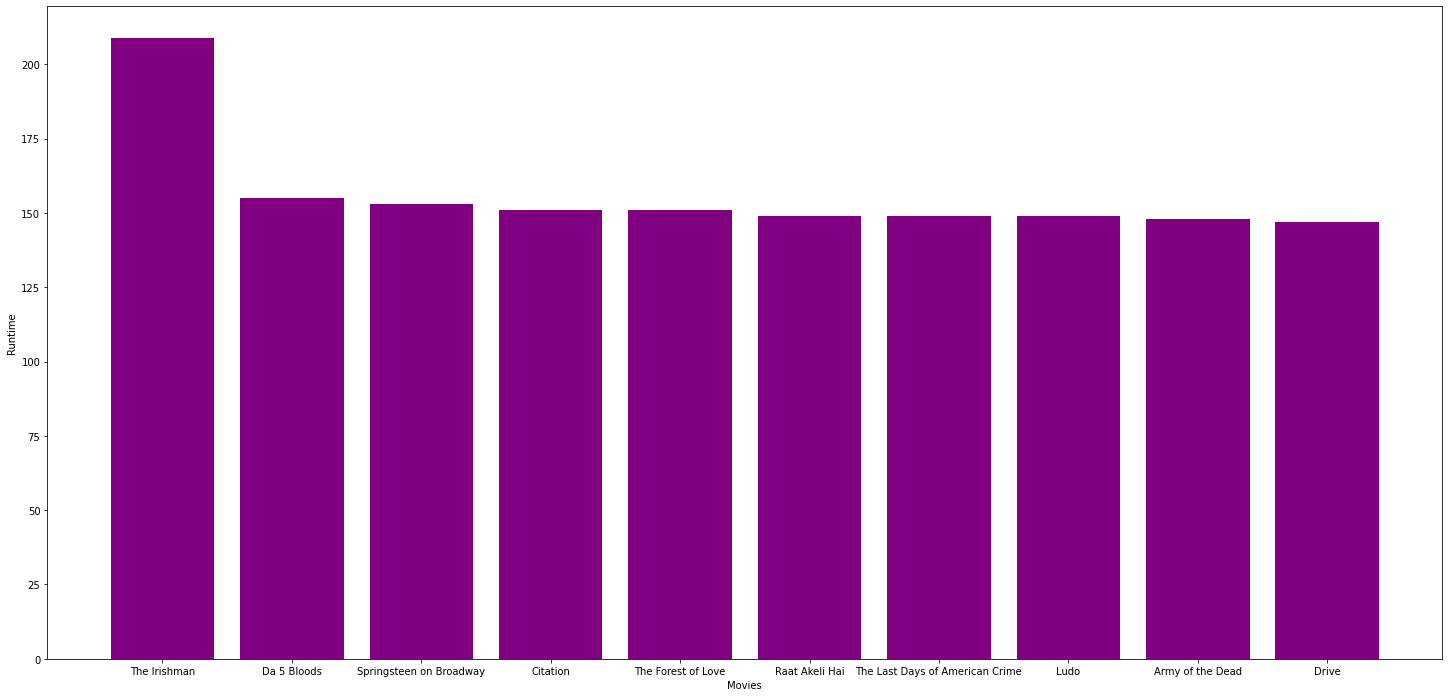

In [ ]:
runtime_top10=veri.sort_values(by="Runtime",ascending=False)
a=runtime_top10.head(10)["Title"]   #x ekseni
b=runtime_top10.head(10)["Runtime"] #y ekseni

#BarPlot Çizimi
fig=plt.figure(figsize=(25,12))
plt.bar(a,b,color="Purple")
plt.xlabel("Movies")
plt.ylabel("Runtime")
plt.show()

Grafikte x ekseni filmleri y ekseni ise Runtime sürelerini göstermektedir. Runtime süresi en yüksek olan film "The Irıshman" dir.

11. Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.

In [ ]:
veri['Year'] = veri['Date'].dt.year
veri['Year'].value_counts(sort=True)[0:1]
year = veri['Year'].value_counts(sort=True)

#BarPlot 
grafik = px.bar(data_frame=veri, x=year.index, y=year.values, labels={"y":"Count of Movies per each Year", "x":"Year"})
grafik.update_layout(xaxis={'categoryorder':'total descending'})

grafik.show()

Grafikte x ekseni yılları gösterirken y ekseni yıllara göre yayınlanan film sayılarını göstermektedir. 
En fazla film yayınlanan yıl 2020 dir

12. Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.

            Language  IMDB Score
0              Malay    4.200000
1   English/Japanese    4.400000
2          Norwegian    5.100000
3           Filipino    5.100000
4             Polish    5.166667
5               Thai    5.450000
6            Swedish    5.500000
7            Italian    5.542857
8     Spanish/Basque    5.600000
9             German    5.640000
10           Turkish    5.660000
11            French    5.770000
12             Dutch    5.800000
13        Indonesian    5.844444
14            Korean    5.916667


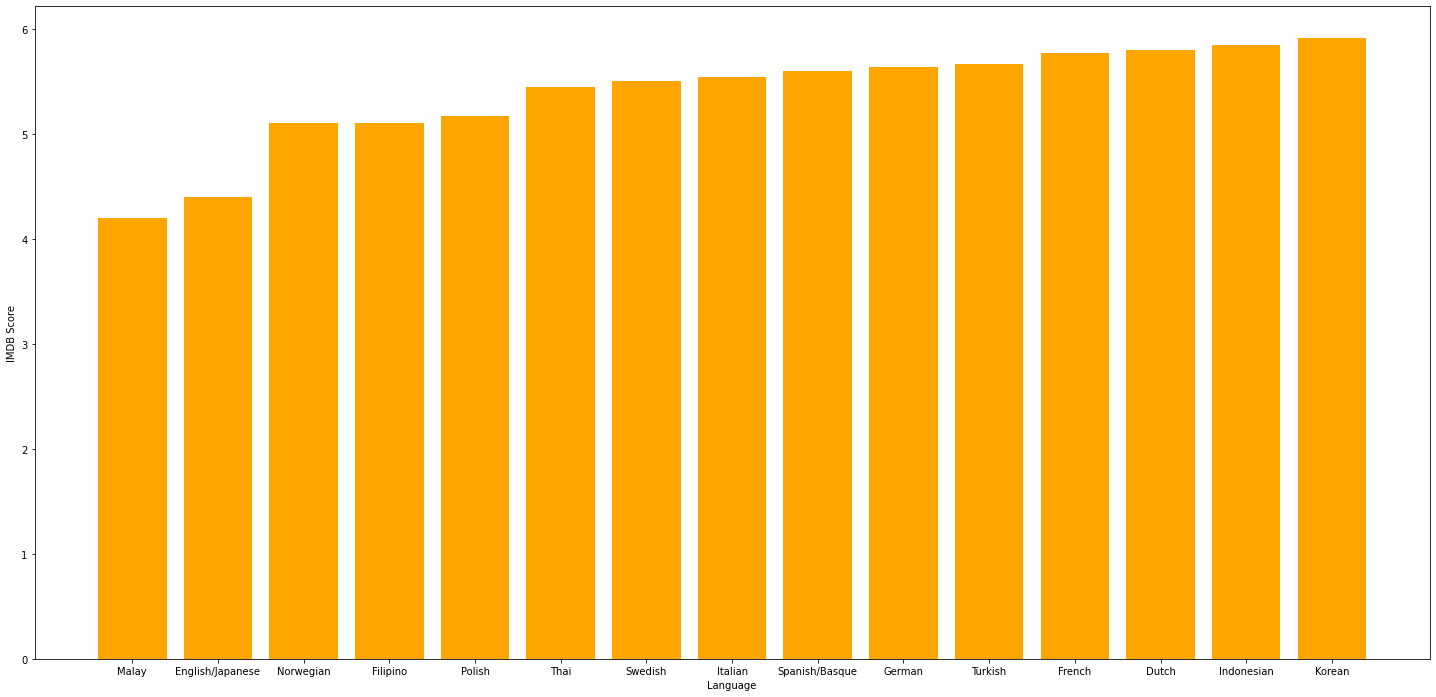

In [ ]:

a=veri.groupby("Language").agg({"IMDB Score": "mean"}).sort_values(by="IMDB Score", ascending=True)[:15].reset_index()
x=a["Language"]
y=a["IMDB Score"]
print(a)

#BarPlot Çizimi
fig=plt.figure(figsize=(25,12))
plt.bar(x,y,color="Orange")
plt.xlabel("Language")
plt.ylabel("IMDB Score")
plt.show()

Grafikte x ekseni filmlerin dillerini gösterirken y ekseni IMDB puanını göstermektedir.
En düşük ortalama IMBD puanına sahip olan dil Malay dilidir.

13. Hangi yılın toplam "runtime" süresi en fazladır?

In [ ]:
veri.groupby("Year").agg({"Runtime": "sum"}).sort_values(by="Runtime", ascending=False)[0:1] 

,Runtime
Year,
2020,17384


14. Her bir dilin en fazla kullanıldığı "Genre" nedir?

In [ ]:
veri.groupby(["Language"])["Genre"].value_counts(sort=True).groupby(level=0).head(1)

Language                    Genre                
Bengali                     Documentary                1
Dutch                       Crime drama                1
English                     Documentary              120
English/Akan                War drama                  1
English/Arabic              Documentary                1
English/Hindi               Documentary                2
English/Japanese            Crime drama                1
English/Korean              Action-adventure           1
English/Mandarin            Documentary                2
English/Russian             Documentary                1
English/Spanish             Documentary                5
English/Swedish             Documentary                1
English/Taiwanese/Mandarin  Drama                      1
English/Ukranian/Russian    Documentary                1
Filipino                    Drama                      1
French                      Documentary                6
Georgian                    Documentar

Analiz sonucunda görüldüğü gibi 
İngilizce dili 120 adet olmak üzere en fazla Documentary türünde kullanılmıştır

İspanyolca dilinin en fazla kullanıldığı tür ise 8 adet olmak üzere yine Documentary türüdür.

Fransızca dili 6 adet film ile yine Documentary türünde en fazla kullanılmıştır.

Portekizce ise 6 adet film ile en fazla

15. Veri setinde outlier veri var mıdır? Açıklayınız.

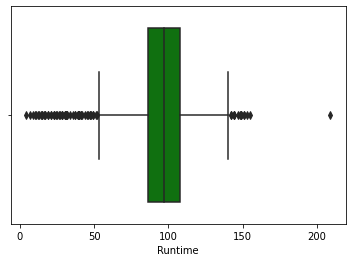

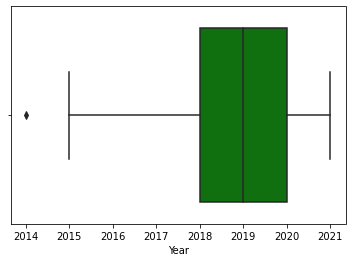

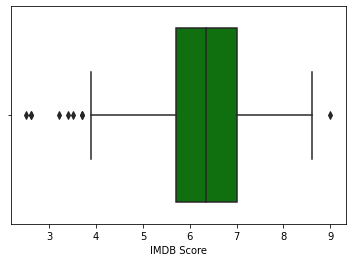

In [ ]:
sayisalSutun = veri.select_dtypes('int64').columns
for i in sayisalSutun:
  sns.boxplot(data=veri,x=veri[i],color='g')
  plt.show()


sayisalSutun1 = veri.select_dtypes('float64').columns
for i in sayisalSutun1:
  sns.boxplot(data=veri,x=veri[i],color='g')
  plt.show()

In [ ]:
Q1 = veri.loc[:,"Runtime":].quantile(0.25)
Q3 = veri.loc[:,"Runtime":].quantile(0.75)
IQR = Q3-Q1

In [ ]:

min_bound = Q1 - 1.5*IQR
max_bound = Q3 + 1.5*IQR
print(min_bound)
print(max_bound)

Runtime         53.00
IMDB Score       3.75
Year          2015.00
dtype: float64
Runtime        141.00
IMDB Score       8.95
Year          2023.00
dtype: float64


In [ ]:
print(np.where(veri['Runtime']>141))
print(np.where(veri['Runtime']<53))
print(np.where(veri['Year']<2015))
print(np.where(veri['IMDB Score']<3.75))
print(np.where(veri['IMDB Score']>8.95))

(array([  5,   7,  16, 118, 194, 247, 284, 328, 365, 389, 509, 543, 545,
       561, 581]),)
(array([ 15,  30,  33,  40,  66, 111, 133, 152, 179, 197, 199, 244, 263,
       278, 295, 301, 309, 320, 325, 326, 334, 345, 363, 378, 393, 394,
       402, 407, 410, 417, 427, 430, 434, 436, 439, 442, 445, 446, 451,
       452, 453, 457, 459, 471, 473, 485, 496, 498, 501, 506, 513, 521,
       522, 524, 528, 529, 541, 552, 560, 577]),)
(array([304]),)
(array([0, 1, 2, 3, 4, 5, 6, 7]),)
(array([583]),)


Toplam 83 tane aykırı değer çıkmıştır. 